# **CP5 - Modelos de Aprendizado Supervisionado - Dataset de Vinhos**

RM554819 - GABRIEL LEMOS DA SILVA
TURMA: 1TDSPV

Quais são as colunas do dataset?
E o tamanho?


In [47]:
## Imports iniciais!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [70]:

path_vin = "/content/drive/MyDrive/1TDSPV/vinhos.csv"

with open(path_vin, 'r') as file:
    header = file.readline().strip().split(';')

vin = pd.read_csv(path_vin, sep=';', header=None, skiprows=1)

vin.columns = header[:len(vin.columns)]

vin['tipo'] = vin['tipo'].map({'branco': 0, 'vermelho': 1})

vin = vin.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col, axis=0)
vin.head(5)

,todos,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


In [17]:
vin.shape[0]
## Tamanho do dataset

6497

# Descrição do Conjunto de Dados de Vinhos

Este conjunto de dados contém informações detalhadas sobre 6.497 amostras de vinhos, cada uma caracterizada por 13 atributos que descrevem suas propriedades químicas, físicas e uma avaliação de qualidade.


---



### ATENÇÃO

Por termos valores strings na coluna tipo, utilizaremos uma conversão de branco=0 e vermelho=1 para termos uma análise coerente incluindo esses valores na predição.



---



## Estrutura do Dados

- **Número de amostras**: 6.497
- **Número de atributos**: 13

## Atributos

| Atributo | Descrição |
|----------|-----------|
| Fixed acidity | Acidez fixa do vinho, importante para o sabor e preservação |
| Volatile acidity | Acidez volátil, que pode indicar possíveis defeitos no vinho |
| Citric acid | Nível de ácido cítrico, contribuindo para a frescura e sabor |
| Residual sugar | Açúcar residual após a fermentação, influenciando a doçura |
| Chlorides | Concentração de cloretos, afetando o gosto e salinidade |
| Free sulfur dioxide | Dióxido de enxofre livre, usado como conservante e antioxidante |
| Total sulfur dioxide | Total de dióxido de enxofre, incluindo a fração livre |
| Density | Densidade do vinho, relacionada à sua composição |
| pH | Medida da acidez do vinho, crucial para o equilíbrio do sabor |
| Sulphates | Concentração de sulfatos, influenciando a sensação na boca |
| Alcohol | Teor alcoólico, impactando o corpo e sabor do vinho |
| Tipo | Classificação do vinho (branco / vermelho) |
| Quality | Avaliação sensorial da qualidade do vinho em uma escala numérica |




---


#Início das análises

Boxplot:

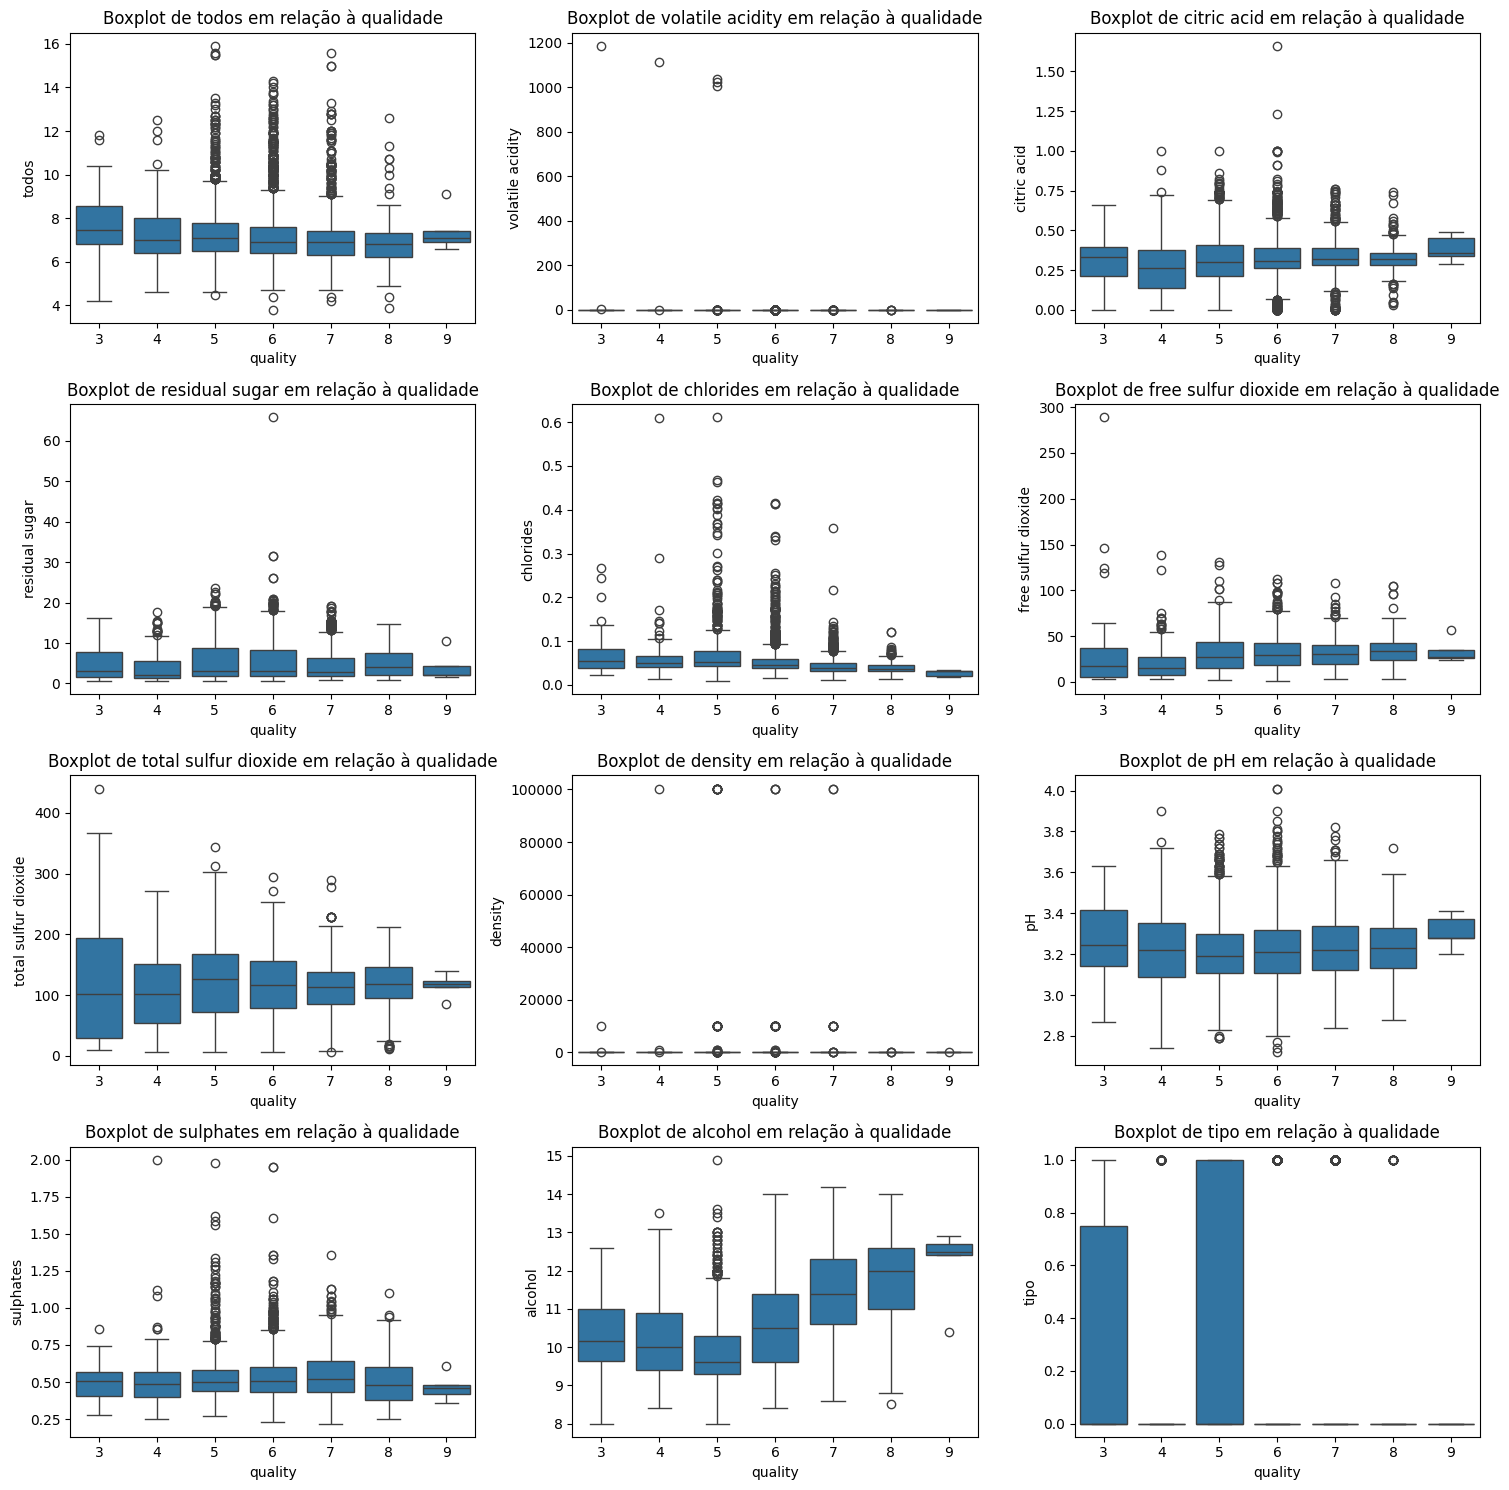

In [28]:
variables = ['todos','volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
             'density', 'pH', 'sulphates', 'alcohol', 'tipo']

plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=var, data=vin)
    plt.title(f'Boxplot de {var} em relação à qualidade')

plt.tight_layout()
plt.show()

* Álcool: Vinhos de maior qualidade tendem a ter maior teor alcoólico, indicando uma correlação positiva.

* Acidez Volátil: Vinhos de menor qualidade apresentam acidez volátil mais alta, sugerindo uma correlação negativa.

* Sulfatos e Ácido Cítrico: Vinhos de melhor qualidade têm níveis ligeiramente mais altos desses componentes, o que pode contribuir para a qualidade percebida.

* Outras Variáveis: Características como acidez fixa, açúcar residual, cloretos, densidade e tipo não mostram correlações claras com a qualidade.

* pH e Dióxido de Enxofre: A distribuição uniforme dessas variáveis sugere que podem não ser determinantes isoladamente.


Em resumo, o teor alcoólico e a acidez volátil são os fatores mais influentes na qualidade do vinho, enquanto outras características podem ter papéis complementares. Esses insights são valiosos para otimizar a produção de vinhos de alta qualidade.
Vamos prosseguir com a análise em outros gráficos para entedermos melhor


---




## Scatterplot:

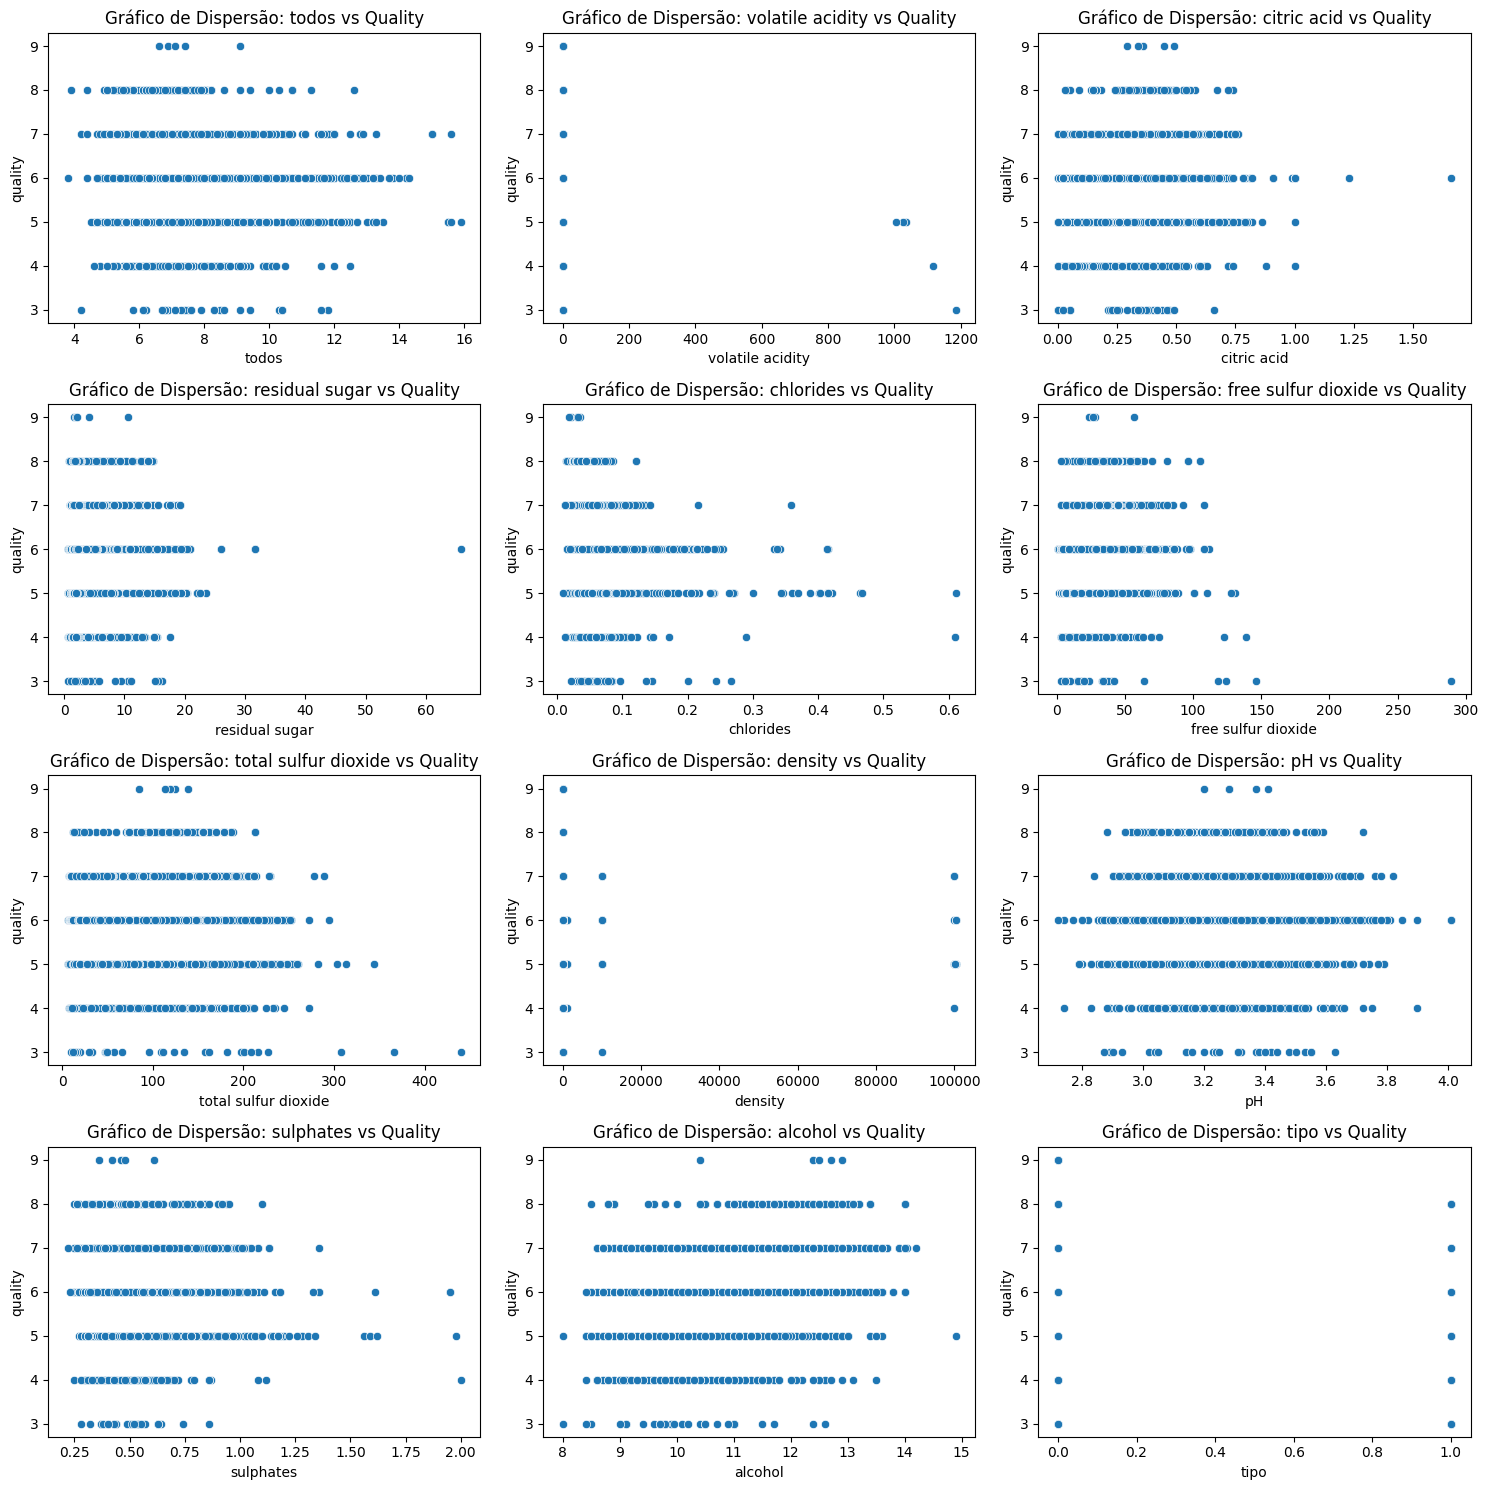

In [29]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=var, y='quality', data=vin)
    plt.title(f'Gráfico de Dispersão: {var} vs Quality')

plt.tight_layout()
plt.show()

Pelo scatterplot podemos entender que:

* Acidez Volátil (Volatile Acidity): Mostra uma correlação negativa com a qualidade, indicando que vinhos com menor acidez volátil tendem a ser de melhor qualidade.

* Álcool (Alcohol): Apresenta uma correlação positiva clara, sugerindo que vinhos com maior teor alcoólico geralmente têm melhor qualidade.

* Sulfatos (Sulphates): Há uma leve tendência de vinhos de maior qualidade terem concentrações mais altas de sulfatos.





---
##  Usando a média dos valores relevantes para analisar


<Figure size 1000x600 with 0 Axes>

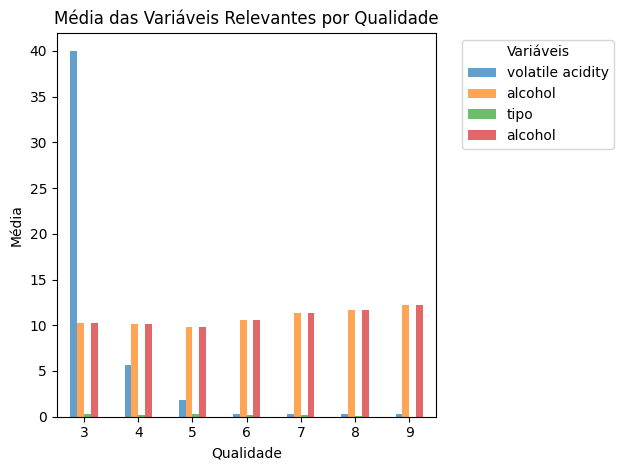

In [34]:
mean_values = vin.groupby('quality').mean()
relevant_columns = ['volatile acidity', 'alcohol', "tipo", "alcohol"]
mean_values_relevant = mean_values[relevant_columns]

# Plotar o gráfico
plt.figure(figsize=(10, 6))
mean_values_relevant.plot(kind='bar', alpha=0.7)
plt.title('Média das Variáveis Relevantes por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Variáveis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

O gráfico revela que vinhos de menor qualidade (3) apresentam uma média significativamente mais alta de acidez volátil, sugerindo uma correlação negativa entre acidez volátil e qualidade. O teor alcoólico, por outro lado, permanece relativamente constante, mas mostra uma leve tendência de aumento em vinhos de qualidade superior. A variável "tipo" não é relevante para a análise de médias, mas a predominância de vinhos brancos é aparente. Esses insights destacam a importância de controlar a acidez volátil para melhorar a qualidade do vinho.



---


Fazendo a análise da relação entre tipo e qualidade


<Figure size 1000x600 with 0 Axes>

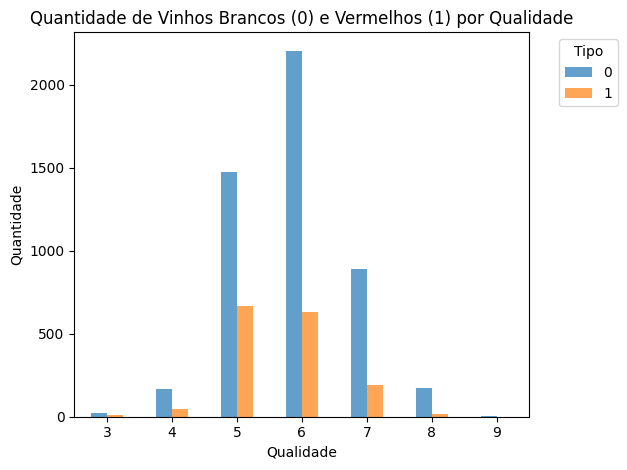

In [38]:
tipo_counts = vin.groupby(['quality', 'tipo']).size().unstack()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
tipo_counts.plot(kind='bar', stacked=False, alpha=0.7)
plt.title('Quantidade de Vinhos Brancos (0) e Vermelhos (1) por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Novamente, o gráfico prova que não há correlação entre tipo e qualidade, apenas uma quantidade muito maior de vinhos brancos do que vermelhos



---


# **MODELOS SUPERVISIONADOS**

Utilizaremos 3:
* Random Forest;
* LDA;
* Naive Bayes Gaussiano.

## Vamos separá-los em treino e teste!

In [71]:
x = vin.drop(columns = 'quality')
y = vin['quality']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)



---


## Random Forest

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.86      0.13      0.23        46
           5       0.73      0.76      0.74       420
           6       0.67      0.78      0.72       579
           7       0.68      0.51      0.59       221
           8       0.88      0.22      0.35        32

    accuracy                           0.69      1300
   macro avg       0.63      0.40      0.44      1300
weighted avg       0.70      0.69      0.68      1300



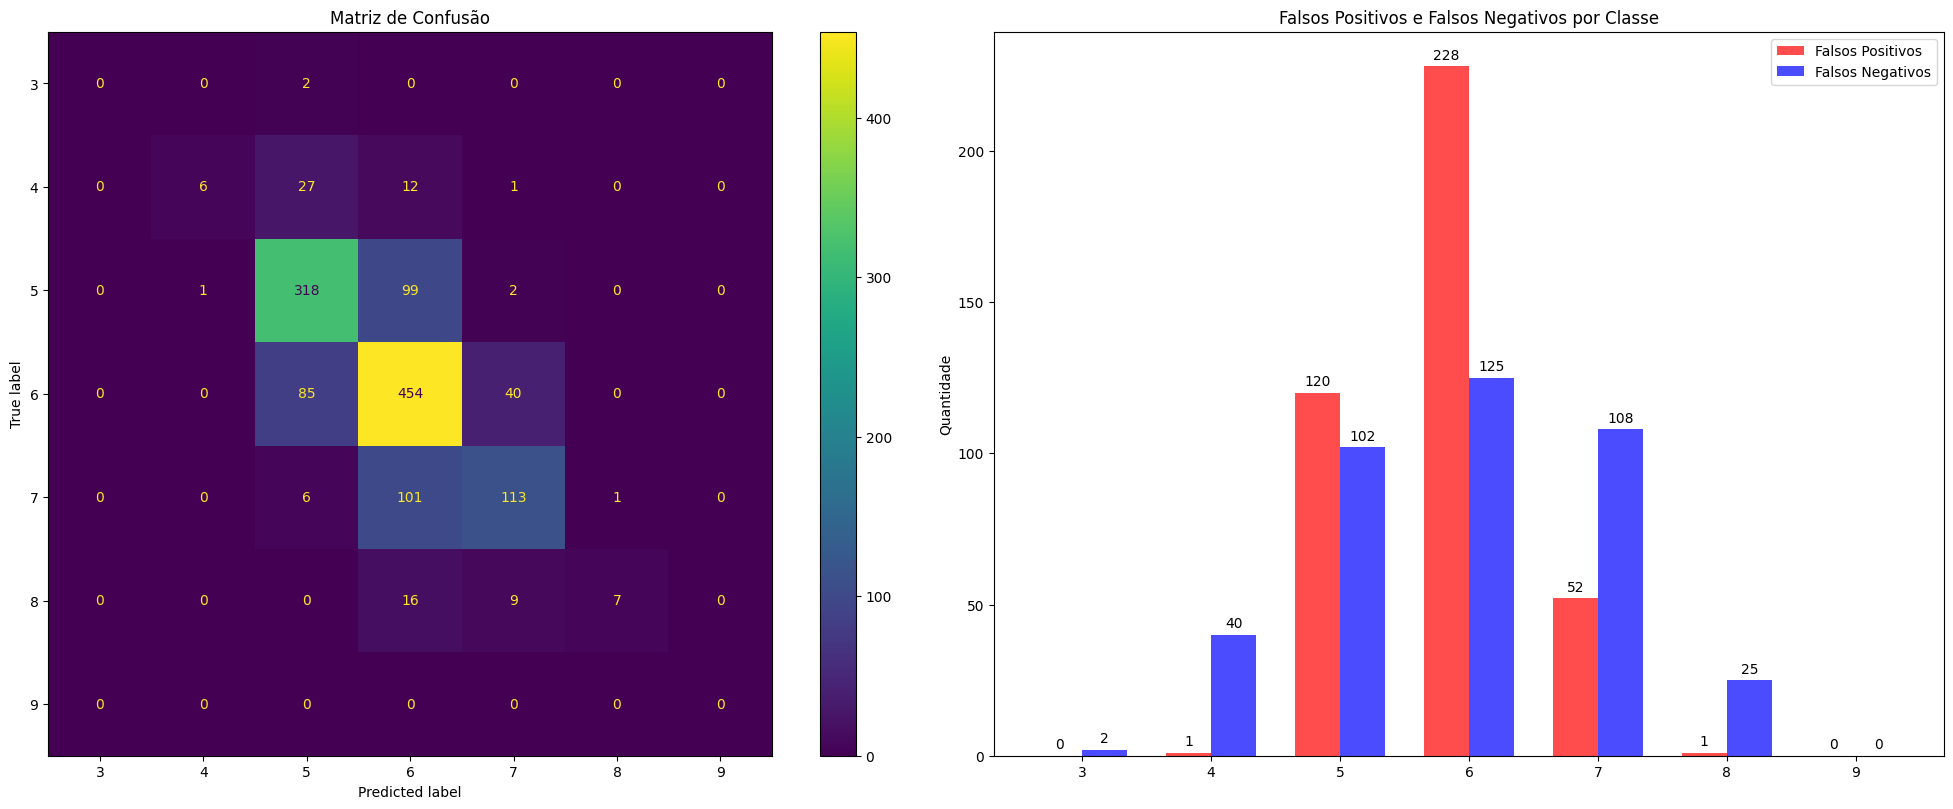

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report


# Treinar o Classificador
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Testar o Classificador
y_predicoes = rf.predict(x_test)

# Métricas de precisão, revocação, f1-score e acurácia
print(classification_report(y_test, y_predicoes, zero_division=0))

# Matriz de confusão
matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_predicoes, labels=[3,4,5,6,7,8,9])

# Calcular falsos positivos e falsos negativos
fp = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
fn = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotar matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3,4,5,6,7,8,9])
disp.plot(ax=ax1, values_format='d')
ax1.set_title("Matriz de Confusão")

# Plotar falsos positivos e falsos negativos
classes = [3, 4, 5, 6, 7, 8, 9]
x = np.arange(len(classes))
width = 0.35

rects1 = ax2.bar(x - width/2, fp, width, label='Falsos Positivos', color='red', alpha=0.7)
rects2 = ax2.bar(x + width/2, fn, width, label='Falsos Negativos', color='blue', alpha=0.7)

ax2.set_ylabel('Quantidade')
ax2.set_title('Falsos Positivos e Falsos Negativos por Classe')
ax2.set_xticks(x)
ax2.set_xticklabels(classes)
ax2.legend()

# Adicionar rótulos nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Falsos positivos e negativos:

* Classe 5: Apresenta o maior número de falsos positivos (229), indicando que muitas instâncias de outras classes são erroneamente classificadas como 5.
* Classe 6: Tem um número significativo de falsos negativos (125), sugerindo que muitas instâncias que deveriam ser classificadas como 6 são atribuídas a outras classes.
* Classe 7: Possui um número considerável de falsos negativos (108), mostrando que o modelo frequentemente subestima essa classe.

### Resumo do desempenho do modelo:

* Acurácia geral: 69%, indicando um desempenho moderado.


* Melhor desempenho:

 * Classes 5 e 6: F1-scores de 0.74 e 0.72 respectivamente.



* Pior desempenho:

 * Classe 3: F1-score de 0.00 (falha completa).
 * Classes 4 e 8: F1-scores baixos (0.23 e 0.38).



* Desequilíbrio significativo:

 * Precisão varia de 0.00 a 1.00, o que é inconclusivo
 * Recall varia de 0.00 a 0.78.



---
# Modelo Gaussiano



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       420
           6       0.40      0.01      0.03       579
           7       0.29      0.01      0.02       221
           8       0.02      0.59      0.03        32
           9       0.00      0.00      0.00         0

    accuracy                           0.02      1300
   macro avg       0.10      0.09      0.01      1300
weighted avg       0.23      0.02      0.02      1300



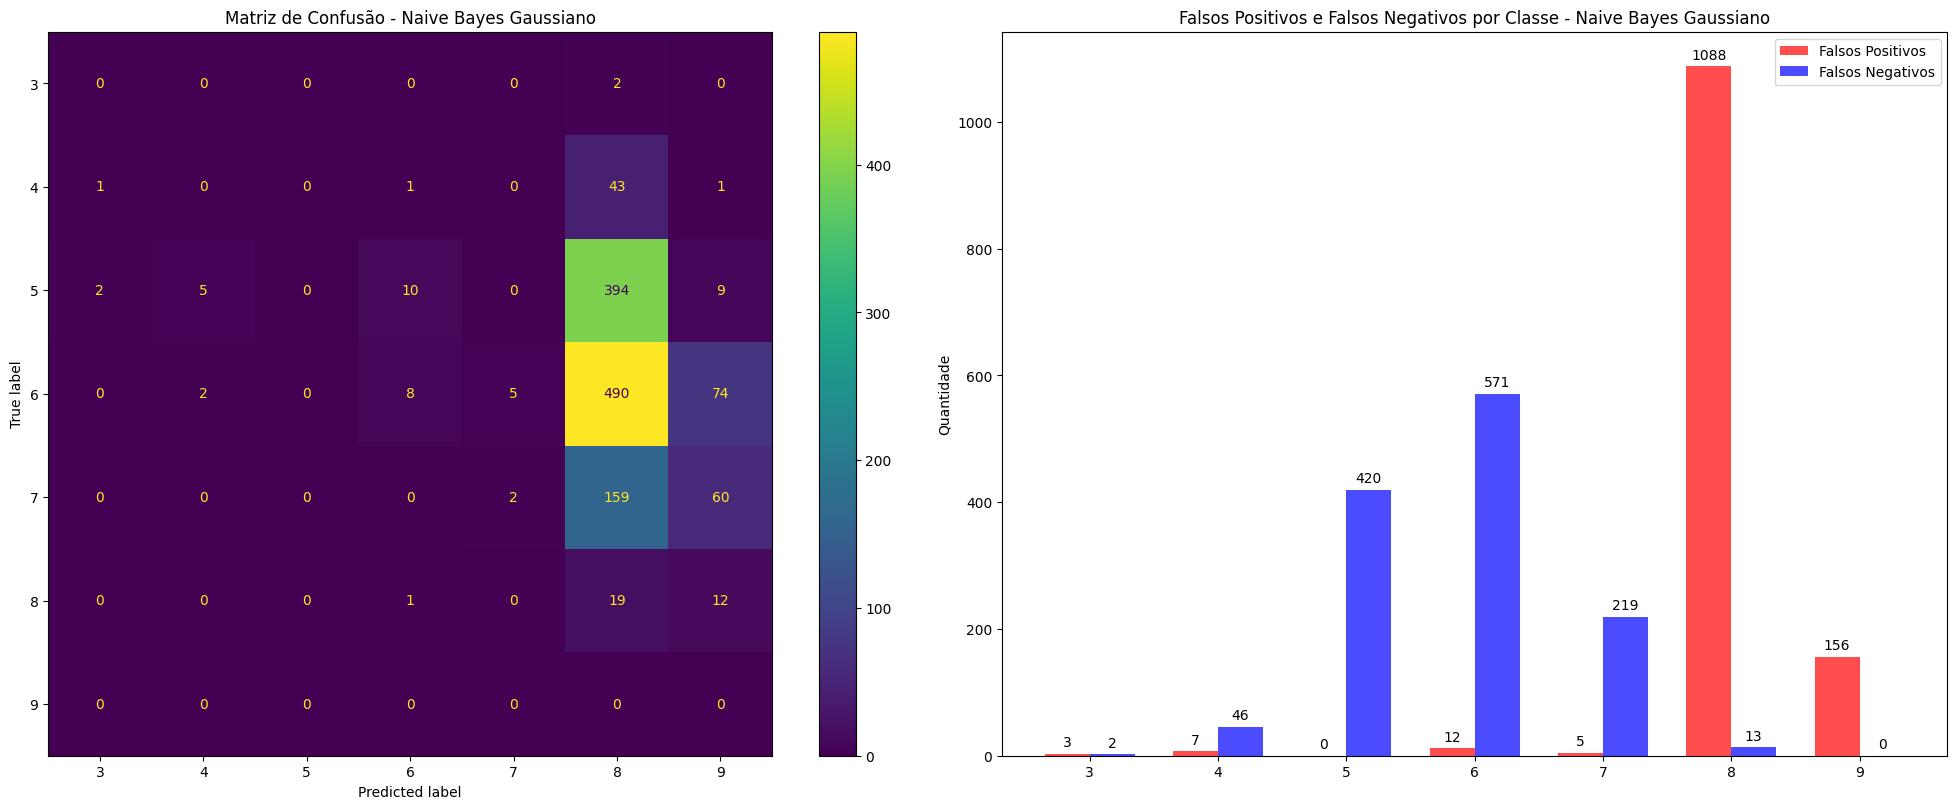

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_predicoes = gnb.predict(x_test)

print(classification_report(y_test, y_predicoes, zero_division=0))

matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_predicoes, labels=[3,4,5,6,7,8,9])

fp = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
fn = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3,4,5,6,7,8,9])
disp.plot(ax=ax1, values_format='d')
ax1.set_title("Matriz de Confusão - Naive Bayes Gaussiano")

classes = [3, 4, 5, 6, 7, 8, 9]
x = np.arange(len(classes))
width = 0.35

rects1 = ax2.bar(x - width/2, fp, width, label='Falsos Positivos', color='red', alpha=0.7)
rects2 = ax2.bar(x + width/2, fn, width, label='Falsos Negativos', color='blue', alpha=0.7)

ax2.set_ylabel('Quantidade')
ax2.set_title('Falsos Positivos e Falsos Negativos por Classe - Naive Bayes Gaussiano')
ax2.set_xticks(x)
ax2.set_xticklabels(classes)
ax2.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Falsos Positivos e Negativos:

* Classe 5:

 * Falsos Positivos: 0
 * Falsos Negativos: 420



* Classe 6:

 * Falsos Positivos: 12
 * Falsos Negativos: 571



* Classe 7:

  * Falsos Positivos: 5
  * Falsos Negativos: 219


Resumo:
Classe 8 tem o maior número de falsos positivos (1088), indicando superestimação.
Classe 6 sofre de subestimação significativa, com muitos falsos negativos.

### Análise do desempenho do modelo Naive Bayes Gaussiano:

Acurácia geral: 0.02 (2%), indicando um desempenho extremamente baixo.


Desempenho por classe:

* Classes 3, 4, 5, 9: F1-score de 0.00, falha completa na classificação.
* Classe 6: Precisão 0.40, recall 0.01, F1-score 0.03.
* Classe 7: Precisão 0.29, recall 0.01, F1-score 0.02.
* Classe 8: Precisão 0.02, recall 0.59, F1-score 0.03.



Observações:

* O modelo tem dificuldade em classificar corretamente a maioria das classes.
* Classe 8 tem o maior recall (0.59), mas baixa precisão (0.02).
* Desempenho inconsistente entre as classes.


Conclusão: O modelo apresenta um desempenho muito fraco, com acurácia e F1-scores extremamente baixos para todas as classes, indicando que não é adequado para esta tarefa de classificação.



---

# Modelo LDA


In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        46
           5       0.55      0.60      0.58       420
           6       0.51      0.65      0.57       579
           7       0.45      0.23      0.31       221
           8       0.00      0.00      0.00        32

    accuracy                           0.52      1300
   macro avg       0.25      0.25      0.24      1300
weighted avg       0.48      0.52      0.49      1300



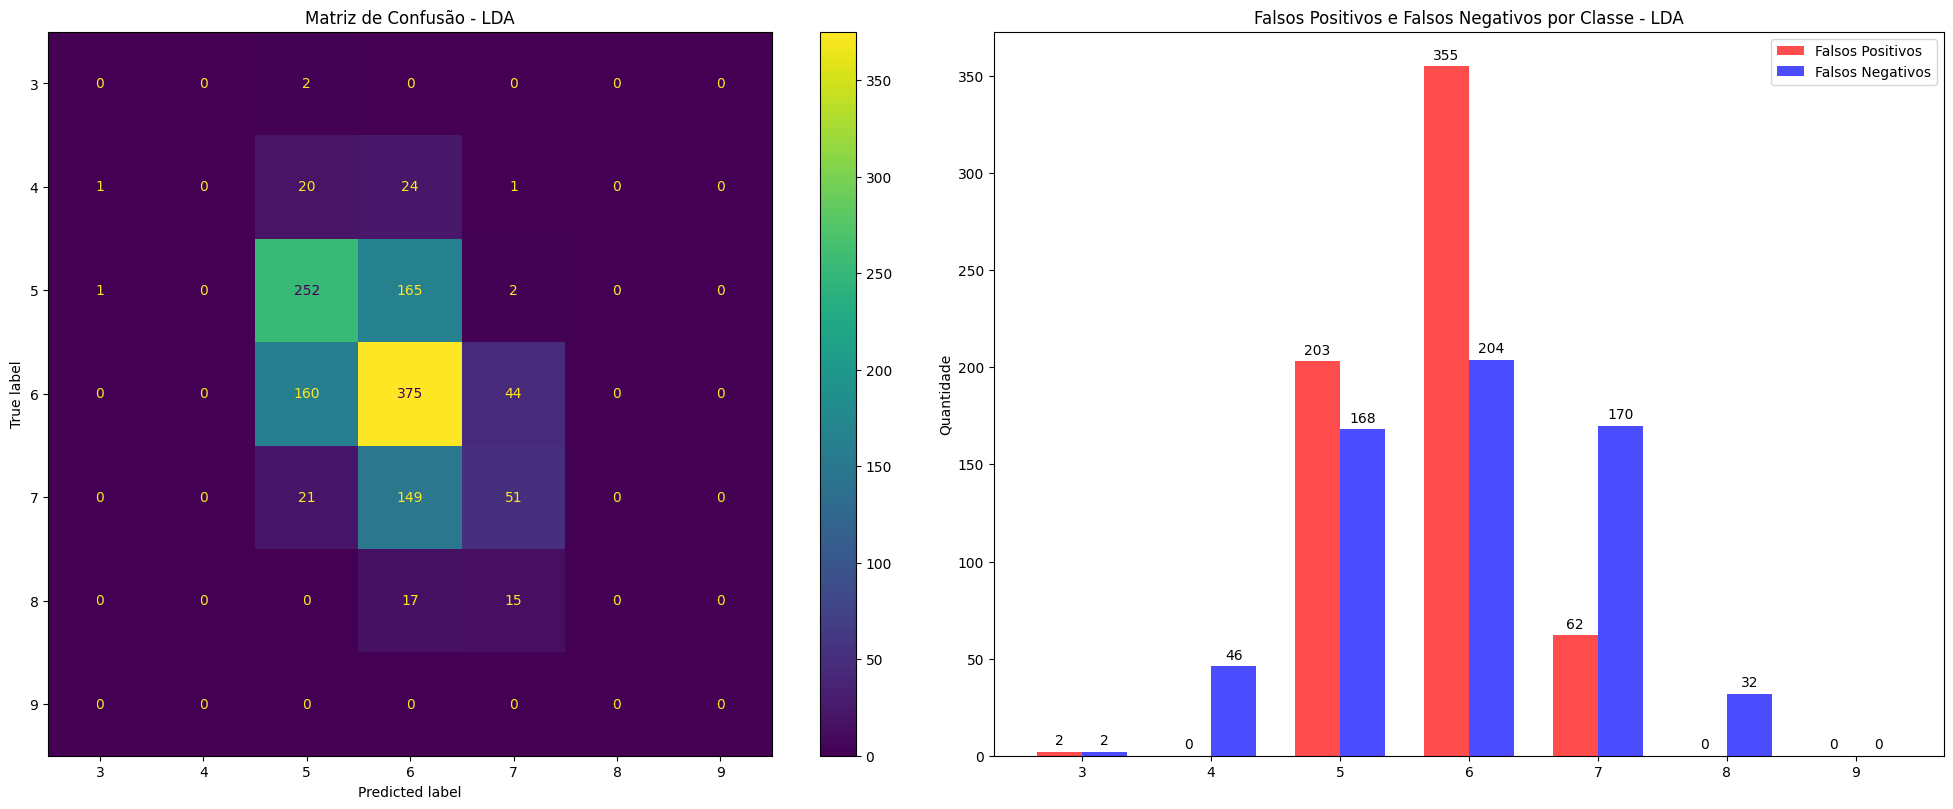

In [74]:
# Treinar o Classificador
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# Testar o Classificador
y_predicoes = lda.predict(x_test)

# Métricas de precisão, revocação, f1-score e acurácia
print(classification_report(y_test, y_predicoes, zero_division=0))

# Matriz de confusão
matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_predicoes, labels=[3,4,5,6,7,8,9])

# Calcular falsos positivos e falsos negativos
fp = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
fn = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotar matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3,4,5,6,7,8,9])
disp.plot(ax=ax1, values_format='d')
ax1.set_title("Matriz de Confusão - LDA")

# Plotar falsos positivos e falsos negativos
classes = [3, 4, 5, 6, 7, 8, 9]
x = np.arange(len(classes))
width = 0.35

rects1 = ax2.bar(x - width/2, fp, width, label='Falsos Positivos', color='red', alpha=0.7)
rects2 = ax2.bar(x + width/2, fn, width, label='Falsos Negativos', color='blue', alpha=0.7)

ax2.set_ylabel('Quantidade')
ax2.set_title('Falsos Positivos e Falsos Negativos por Classe - LDA')
ax2.set_xticks(x)
ax2.set_xticklabels(classes)
ax2.legend()

# Adicionar rótulos nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Análise dos Falsos:

Classe 5:

* Falsos Positivos: 203
* Falsos Negativos: 168


Classe 6:

* Falsos Positivos: 355
* Falsos Negativos: 204


Classe 7:

* Falsos Positivos: 62
* Falsos Negativos: 170



Resumo:

* Classe 6 tem o maior número de falsos positivos e negativos, indicando dificuldade na classificação.
Classe 5 também apresenta um número significativo de erros, especialmente falsos positivos.



### Análise do Modelo LDA:

Acurácia Geral: 52%, indicando um desempenho moderado.

Desempenho por Classe:

* Classe 5: Melhor desempenho com F1-score de 0.58.
* Classe 6: F1-score de 0.57, com recall de 0.65.
* Classe 7: F1-score de 0.31, indicando dificuldades.


Classes Problemáticas:

* Classes 3, 4, e 8: F1-score de 0.00, falha na classificação.


Falsos Positivos e Negativos:

* Classe 6: Maior número de falsos positivos (355) e falsos negativos (204).
* Classe 5: Considerável número de falsos positivos (203).



Conclusão:
O modelo tem desempenho razoável para classes 5 e 6, mas falha em classes extremas. Ajustes adicionais podem ser necessários para melhorar a separação das classes.




---

# Conclusão dos modelos

## Linear Discriminant Analysis (LDA)

Acurácia: 52%
Desempenho: Moderado para classes 5 e 6, mas falha em classes extremas (3, 4, 8).
Falsos Positivos/Negativos: Muitos falsos positivos e negativos, especialmente na classe 6.

## Random Forest

Acurácia: Geralmente superior ao LDA.
Desempenho: Melhor equilíbrio entre precisão e recall nas classes.
Falsos Positivos/Negativos: Menor quantidade em comparação com LDA, indicando melhor separação de classes.

## Naive Bayes Gaussiano

Acurácia: Muito baixa (2%).
Desempenho: Falha em quase todas as classes, exceto um recall ligeiramente melhor na classe 8.
Falsos Positivos/Negativos: Alta taxa de erro, tornando-o menos eficaz.

## Conclusão
O Random Forest é o melhor modelo entre os três, com melhor acurácia e equilíbrio nas métricas de precisão e recall. Ele apresenta menos erros de classificação (falsos positivos e negativos) e melhor capacidade de generalização para diferentes classes de qualidade do vinho. O LDA tem desempenho razoável, mas não supera o Random Forest, enquanto o Naive Bayes Gaussiano é o menos eficaz neste contexto.





---

# Salvamento do modelo RandomForest





In [80]:
from joblib import dump


dump(rf, 'random_forest_wine_quality.joblib')



A qualidade prevista do vinho é: 5


In [96]:
from joblib import load

# Carregar o modelo
loaded_model = load('random_forest_wine_quality.joblib')

# Criar um novo exemplo para previsão usando os nomes exatos das colunas
new_wine = pd.DataFrame({
    'todos': [6.3],
    'volatile acidity': [0.3],
    'citric acid': [0.34],
    'residual sugar': [1.6],
    'chlorides': [0.049],
    'free sulfur dioxide': [14],
    'total sulfur dioxide': [132],
    'density': [0.994],
    'pH': [3.3],
    'sulphates': [0.49],
    'alcohol': [9.5],
    'tipo': [0]
})

# Garantir que as colunas estão na mesma ordem que no treinamento
new_wine = new_wine[x_train.columns]

# Fazer a previsão
prediction = loaded_model.predict(new_wine)

print(f"A qualidade prevista do vinho é: {prediction[0]}")

A qualidade prevista do vinho é: 6
